In [111]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

full_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

full_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
clinical_trial_data.sort_values(['Mouse ID', 'Timepoint']).head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1


In [3]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


## Tumor Response to Treatment

In [4]:
full_data['Drug'].value_counts()


Capomulin    230
Ramicane     228
Stelasyn     194
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug, dtype: int64

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumorvol = full_data.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

tumvoldf = pd.DataFrame(tumorvol.mean()).reset_index()

# Preview DataFrame

tumvoldf.head()


,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [6]:
#Checking the max timepoint:


full_data['Timepoint'].max()



45

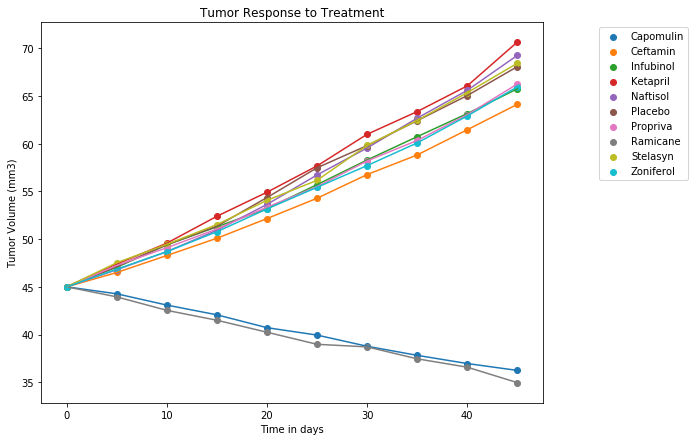

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [7]:
timepoint = np.arange(0,50,5)
druglist= list(tumvoldf['Drug'].unique())
tumvolmax = tumvoldf['Tumor Volume (mm3)'].max()
tumvolmin = tumvoldf['Tumor Volume (mm3)'].min()


vol= []
for drug in druglist:
    for i in range(len(tumvoldf)):
        if tumvoldf['Drug'][i]== drug:
            
            vol.append(tumvoldf['Tumor Volume (mm3)'][i])
    
    
#plt.axis([0,40,tumvolmin-5,tumvolmax+1])
plt.figure(figsize = (9,7))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time in days')
plt.ylabel('Tumor Volume (mm3)')

for i in range(len(druglist)):

    plt.scatter(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = druglist[i])

    plt.plot(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = '')

    
plt.legend(loc= 9, bbox_to_anchor=(1.2, 1), ncol=1)
plt.show()



#Note: I made this chart this way because of the simplicity of iterating through 'druglist' for the labels.

#druglist
timepoint

In [8]:
tumvoldf.loc[tumvoldf['Drug']== 'Capomulin']['Tumor Volume (mm3)']

0    45.000000
1    44.266086
2    43.084291
3    42.064317
4    40.716325
5    39.939528
6    38.769339
7    37.816839
8    36.958001
9    36.236114
Name: Tumor Volume (mm3), dtype: float64

In [9]:
list(timepoint)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [10]:
full_data.loc[(full_data['Drug'] == 'Capomulin') & (full_data['Timepoint'] == 10)]['Tumor Volume (mm3)']

570    43.270852
580    46.544292
590    37.614948
600    43.231963
610    46.154737
620    41.999228
630    35.624403
635    46.568417
645    46.425366
655    46.759074
665    46.414518
675    44.502042
685    39.005493
695    46.304003
705    41.630010
715    43.421014
725    43.688026
735    42.992077
745    39.848223
755    39.113891
765    36.825367
775    39.952347
778    46.749006
788    46.059608
792    46.408361
Name: Tumor Volume (mm3), dtype: float64

In [194]:
errorvol = tumvoldf[['Drug', 'Timepoint']]
errorvol['Std error'] = 0

timelist = list(timepoint)


# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#This is a hell of a piece of code here. You can see above how I worked it out.

#what it does is loop through both timelist, which is all of the timepoints, and druglist, which is all of the drugs. It then calculates the standard
#error for observations in full_data that have both of these criteria. Then it spits out all three as a three-part tuple, composed of 
#(drug, timepoint, std error). Phew. I am very pleased with this. 5 lines!

errorlist = []    

for j in range(len(timelist)):
    for i in range(len(druglist)):
        errorlist.append((druglist[i], timelist[j],
                          pd.DataFrame.sem(full_data.loc[(full_data['Drug'] == druglist[i]) & 
                                                         (full_data['Timepoint'] == timelist[j])]['Tumor Volume (mm3)'])))

        


# I found the below code on stack overflow. We take this three-part tuple and turn it into a dictionary with a tuple for a key:

errordict = { (error, timepoint): drug for error, timepoint, drug in errorlist}

#Next we turn it into a dataframe. 
errordf = pd.Series(errordict).reset_index()
errordf.columns = ['Drug', 'Timepoint', "Std Error"]


errordf.head()


,Drug,Timepoint,Std Error
0,Capomulin,0,0.0
1,Ceftamin,0,0.0
2,Infubinol,0,0.0
3,Ketapril,0,0.0
4,Naftisol,0,0.0


In [12]:
#We can simply sort the dataframe, so that it looks like the example. 

errordf.sort_values(['Drug', 'Timepoint']).head()


,Drug,Timepoint,Std Error
0,Capomulin,0,0.000000
10,Capomulin,5,0.448593
20,Capomulin,10,0.702684
30,Capomulin,15,0.838617
40,Capomulin,20,0.909731


In [13]:
timepoint

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [14]:
# Minor Data Munging to Re-Format the Data Frames

tumdrugdf = pd.DataFrame(columns = list(tumvoldf['Drug'].unique()))

# Preview that Reformatting worked

tumdrugdf = tumdrugdf.append(pd.DataFrame(timepoint)).set_index(0).reset_index()

tumdrugdf

,0,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:


tumdrugdf.columns = ['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', "Placebo", 'Propriva', 'Ramicane',"Stelasyn", "Zoniferol"]


#Note: Why does the below not work? 

#tumdrugdf = tumdrugdf.rename(columns = {'0':'Timepoint'}, inplace = True)

#or

#tumdrugdf = tumdrugdf.rename({'0':'Timepoint'}, axis=1)

#Neither of these work, but documentation indicates they should work.

tumdrugdf

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
x=np.arange(0,10,1)

for i in range(len(druglist)):
   
    y = 10*i
    z = y+x
    tumdrugdf[druglist[i]]  = list(tumvoldf['Tumor Volume (mm3)'][z])
    
    #print(z)

tumdrugdf

#note: I don't like this method. I tried for almost an hour to use .loc to do something like index()match() in excel. We have two coordinates, 
#timepoint and drug. We should be able to fill a 2d plane by timepoint and drug in one function. I couldn't get it to work. I am sure there
#is a way to do this. For the above code, I took advantage of the fact that there are 10 observations for each drug, but this wasn't satisfying.

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5.0,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10.0,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15.0,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20.0,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25.0,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30.0,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35.0,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40.0,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45.0,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [17]:
#testing the above method

x=np.arange(0,10,1)

for i in range(len(druglist)):

    y = (10*i)
    print(x+y)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [107]:
errordf2 = errordf.sort_values(['Drug', 'Timepoint'])

errordf2.head()

,Drug,Timepoint,Std Error
0,Capomulin,0,0.000000
10,Capomulin,5,0.448593
20,Capomulin,10,0.702684
30,Capomulin,15,0.838617
40,Capomulin,20,0.909731


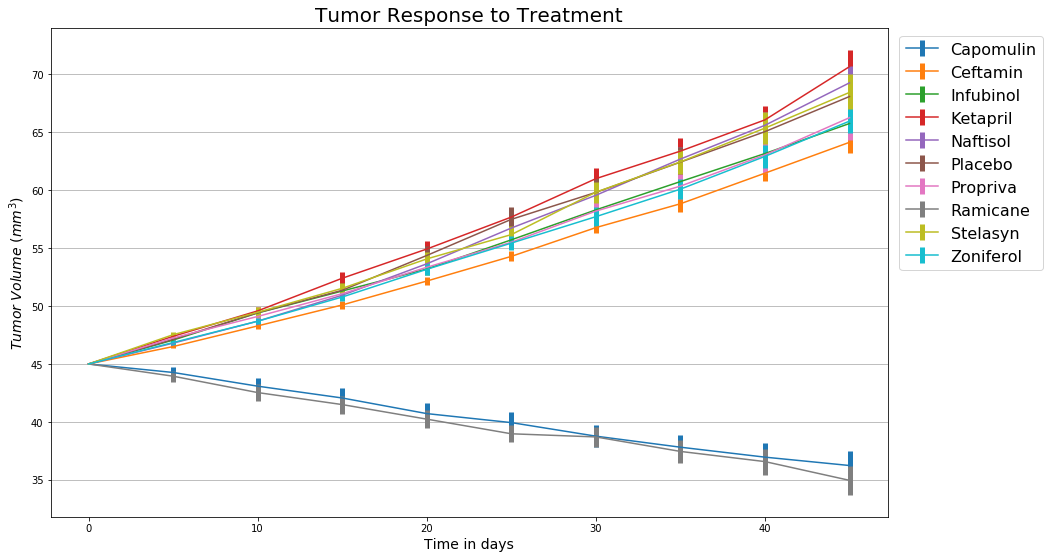

In [106]:
# Generate the Plot (with Error Bars)

timepoint = np.arange(0,50,5)
druglist= list(tumvoldf['Drug'].unique())
tumvolmax = tumvoldf['Tumor Volume (mm3)'].max()
tumvolmin = tumvoldf['Tumor Volume (mm3)'].min()


vol= []
for drug in druglist:
    for i in range(len(tumvoldf)):
        if tumvoldf['Drug'][i]== drug:
            
            vol.append(tumvoldf['Tumor Volume (mm3)'][i])
    
    
#plt.axis([0,40,tumvolmin-5,tumvolmax+1])
plt.figure(figsize = (15,9))
plt.title('Tumor Response to Treatment', size = 20)
plt.xlabel('Time in days', size= 14)
plt.ylabel('$Tumor\ Volume\ (mm^3)$', size=14)
plt.grid(True, axis='y')
for i in range(len(druglist)):

    plt.errorbar(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = druglist[i],
                 yerr = errordf2.loc[errordf2['Drug'] == druglist[i]]['Std Error'],
                elinewidth = 5)

    
plt.legend(loc= 9, bbox_to_anchor=(1.1, 1), ncol=1, prop={'size': 16})
plt.show()

#Note: I took some liberties with formatting the graph here, because the original is hard to see. My result is also a bit tough to see, but I think
#it is an improvement. 

# Save the Figure

# Show the Figure


## Metastatic Response to Treatment

In [119]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

#reusing the previous code

#metdf = tumvoldf[['Drug', 'Timepoint']]
#metdf['Std error'] = 0

timelist = list(timepoint)
meanmetlist = []    

for j in range(len(timelist)):
    for i in range(len(druglist)):
        meanmetlist.append((druglist[i], timelist[j],
                          pd.DataFrame.mean(full_data.loc[(full_data['Drug'] == druglist[i]) & 
                                                         (full_data['Timepoint'] == timelist[j])]['Metastatic Sites'])))

        


# Reused this great code here as well. We take this three-part tuple and turn it into a dictionary with a tuple for a key:

meanmetdict = { (meanmet, timepoint): drug for meanmet, timepoint, drug in meanmetlist}

#Next we turn it into a dataframe. 
metdf = pd.Series(meanmetdict).reset_index()
metdf.columns = ['Drug', 'Timepoint', "Mean Metastatic Sites"]


metdf2 = metdf.sort_values(['Drug', 'Timepoint'])



metdf2.head()

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
10,Capomulin,5,0.160000
20,Capomulin,10,0.320000
30,Capomulin,15,0.375000
40,Capomulin,20,0.652174


In [118]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame

#This code can be adapted by changing 5 words or so.


timelist = list(timepoint)
errmetlist = []    

for j in range(len(timelist)):
    for i in range(len(druglist)):
        errmetlist.append((druglist[i], timelist[j],
                          pd.DataFrame.sem(full_data.loc[(full_data['Drug'] == druglist[i]) & 
                                                         (full_data['Timepoint'] == timelist[j])]['Metastatic Sites'])))

        


# Reused this great code here as well. We take this three-part tuple and turn it into a dictionary with a tuple for a key:

errmetdict = { (errmet, timepoint): drug for errmet, timepoint, drug in errmetlist}

#Next we turn it into a dataframe. 
errmetdf = pd.Series(errmetdict).reset_index()
errmetdf.columns = ['Drug', 'Timepoint', "Std Error of Metastatic Sites"]


errmetdf2 = errmetdf.sort_values(['Drug', 'Timepoint'])



errmetdf2.head()




,Drug,Timepoint,Std Error of Metastatic Sites
0,Capomulin,0,0.000000
10,Capomulin,5,0.074833
20,Capomulin,10,0.125433
30,Capomulin,15,0.132048
40,Capomulin,20,0.161621


In [22]:
# Minor Data Munging to Re-Format the Data Frames

#I proved I could do this before, and with the methods I am using this is not necessary to make the graph. I'm going to complete questions further on
#and come back to this one. 

# Preview that Reformatting worked


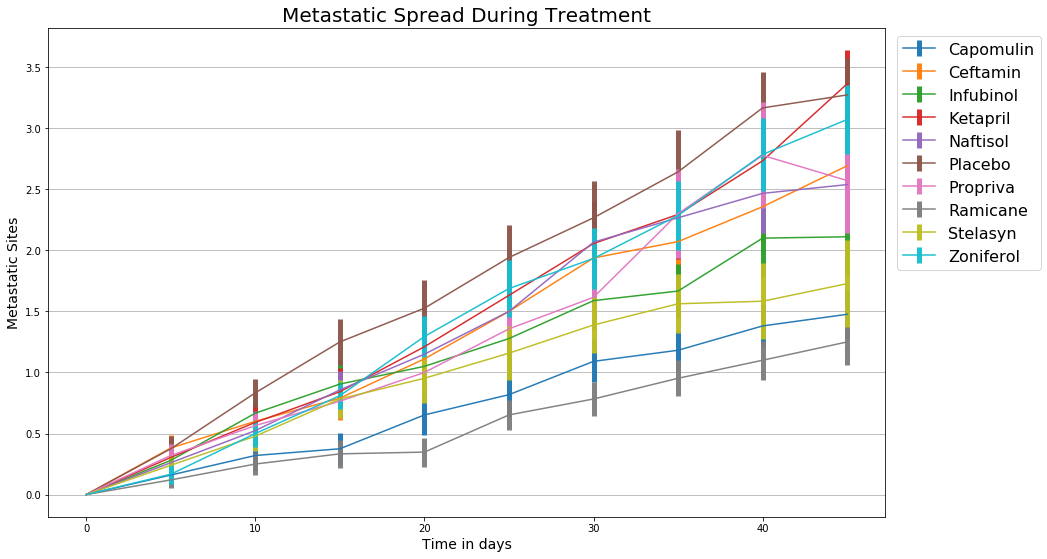

In [123]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


timepoint = np.arange(0,50,5)
druglist= list(errmetdf2['Drug'].unique())
#errmetmax = errmetdf2['Std Error of Metastatic Sites'].max()
#errmetmin = errmetdf2['Std Error of Metastatic Sites'].min()


met= []
for drug in druglist:
    for i in range(len(metdf2)):
        if metdf2['Drug'][i]== drug:
            
            met.append(metdf2['Mean Metastatic Sites'][i])
    
    
#plt.axis([0,40,tumvolmin-5,tumvolmax+1])
plt.figure(figsize = (15,9))
plt.title('Metastatic Spread During Treatment', size = 20)
plt.xlabel('Time in days', size= 14)
plt.ylabel('Metastatic Sites', size=14)
plt.grid(True, axis='y')
for i in range(len(druglist)):

    plt.errorbar(metdf2.loc[metdf2['Drug']== druglist[i]]['Timepoint'],
             metdf2.loc[metdf2['Drug']== druglist[i]]['Mean Metastatic Sites'],
             label = druglist[i],
                 yerr = errmetdf2.loc[errmetdf2['Drug'] == druglist[i]]['Std Error of Metastatic Sites'],
                elinewidth = 5,
                )

    
plt.legend(loc= 9, bbox_to_anchor=(1.1, 1), ncol=1, prop={'size': 16})
plt.show()

#Note: Again, I used my formatting. I tried a few methods, and I will continue to improve this over time. 

# Save the Figure

# Show the Figure







In [125]:
#Stole this from https://tonysyu.github.io/plotting-error-bars.html#.XDAR9FxKjIV
#I didn't like these error bars, so I wanted to try something new.

def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)
    
    
#Note 2: This doesn't appear to work with the iterative method I have used for plotting the graph. I look forward to checking out
# the suggested solution to get an idea of how else to tackle this. I would like to use the error bars created by this. 

#Another option was Gaussian error, which looks very intuitive, and distinguishes between known measured points and the uncertainty 
#between measurments. #https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

## Survival Rates

In [159]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

# I should have just copied the code from above, but for some reason I wrote this one out again. Tried a different method first, 
#but if it ain't broke, don't fix it.

survlist = []

for i in range(len(druglist)):
    for j in range(len(timelist)):
        survlist.append((druglist[i],
                         timelist[j],
            full_data.loc[(full_data['Drug'] == druglist[i])&
                 (full_data['Timepoint'] == timelist[j])]['Mouse ID'].count()))
        
        

survdict = { (survcount, timepoint): drug for survcount, timepoint, drug in survlist}

#Next we turn it into a dataframe. 
survdf = pd.Series(survdict).reset_index()
survdf.columns = ['Drug', 'Timepoint', "Mice Alive"]


survdf2 = survdf.sort_values(['Drug', 'Timepoint'])
        


survdf2.head()

,Drug,Timepoint,Mice Alive
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame

#Again, me changing the format does nothing here. I did an example in the first question to prove it was possible. I will go back later 
#and complete this


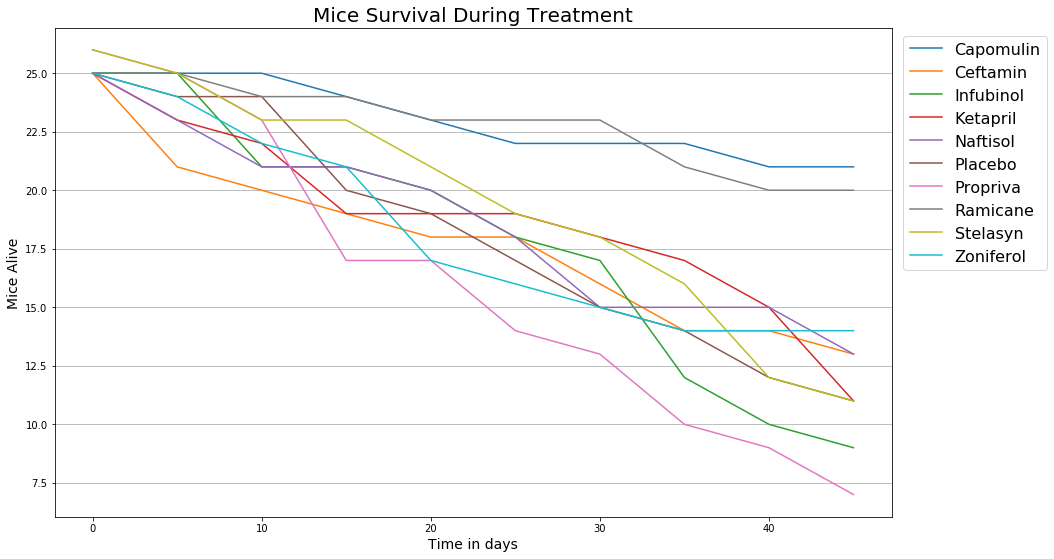

In [157]:
# Generate the Plot (Accounting for percentages)


#Note: I did two plots here, because I didn't read the directions before and express mice survival as a percentage. The first plot
#simply shows the mice population declining.

# Save the Figure

# Show the Figure

plt.figure(figsize = (15,9))
plt.title('Mice Survival During Treatment', size = 20)
plt.xlabel('Time in days', size= 14)
plt.ylabel('Mice Alive', size=14)
plt.grid(True, axis='y')
for i in range(len(druglist)):

    plt.plot(survdf2.loc[survdf2['Drug']== druglist[i]]['Timepoint'],
             survdf2.loc[survdf2['Drug']== druglist[i]]['Mice Alive'],
             label = druglist[i]
                )

    
plt.legend(loc= 9, bbox_to_anchor=(1.1, 1), ncol=1, prop={'size': 16})
plt.show()






plt.show()

In [160]:
survdf2.loc[survdf2['Timepoint']== 0]['Mice Alive']

#This was where I realized I couldn't just use 25 for the number of Mice alive at time 0 for each drug. 

0     25
10    25
20    25
30    25
40    25
50    25
60    26
70    25
80    26
90    25
Name: Mice Alive, dtype: int64

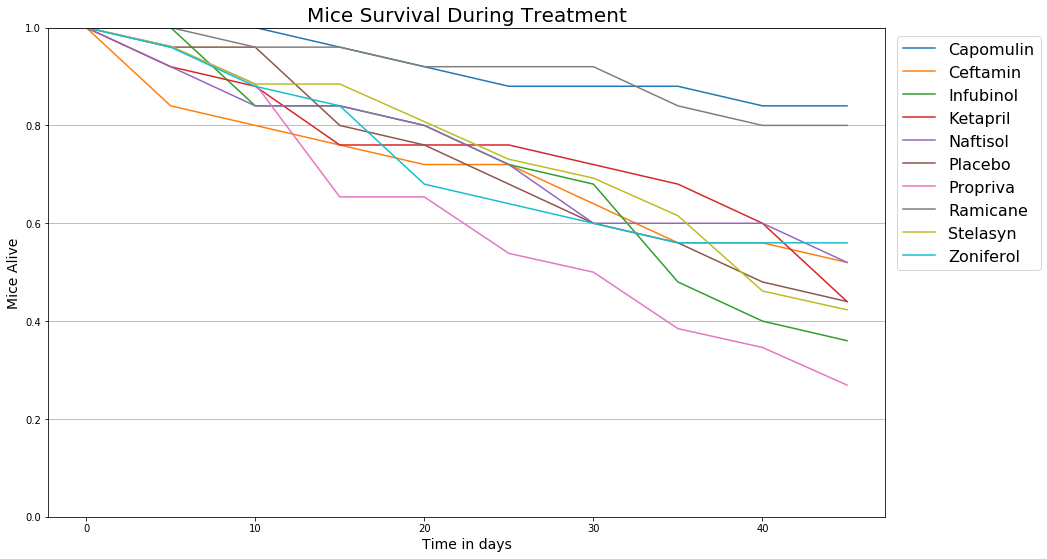

In [193]:
# Generate the Plot (Accounting for percentages)



#Note: Second plot showing  it as a percentage

# Save the Figure

# Show the Figure
    
plt.figure(figsize = (15,9))
plt.title('Mice Survival During Treatment', size = 20)
plt.xlabel('Time in days', size= 14)
plt.ylabel('Mice Alive', size=14)

plt.grid(True, axis='y')



for i in range(len(druglist)):

    plt.plot(survdf2.loc[survdf2['Drug']== druglist[i]]['Timepoint'],
             ((survdf2.loc[survdf2['Drug']== druglist[i]]['Mice Alive'])/
              (survdf2.loc[(survdf2['Timepoint']== 0) & (survdf2['Drug'] == druglist[i])]['Mice Alive']).iloc[0]),
             label = druglist[i]
                )

 #Note: This third line is a bit weird, but it is finding the first value in the series produced by the call to get the number of mice alive 
#for a given drug at timepoint 0.


plt.legend(loc= 9, bbox_to_anchor=(1.1, 1), ncol=1, prop={'size': 16})
plt.show()






plt.show()

## Summary Bar Graph

In [177]:
#testing how the .loc function was working here. 

x = survdf2.loc[(survdf2['Timepoint']== 0) & (survdf2['Drug'] == 'Capomulin')]['Mice Alive']

x.iloc[0]

25

In [238]:
zerovol = tumvoldf.loc[tumvoldf['Timepoint']==0].reset_index()
endvol  = tumvoldf.loc[tumvoldf['Timepoint']==45].reset_index()

changevol =   pd.DataFrame({
                'Drug': zerovol['Drug'],
                'Tumor Volume Beginning': zerovol['Tumor Volume (mm3)']})



changevol['Tumor Volume End'] = endvol['Tumor Volume (mm3)']
changevol['Change'] = changevol['Tumor Volume End']- changevol['Tumor Volume Beginning']
changevol

,Drug,Tumor Volume Beginning,Tumor Volume End,Change
0,Capomulin,45.0,36.236114,-8.763886
1,Ceftamin,45.0,64.132421,19.132421
2,Infubinol,45.0,65.755562,20.755562
3,Ketapril,45.0,70.662958,25.662958
4,Naftisol,45.0,69.265506,24.265506
5,Placebo,45.0,68.084082,23.084082
6,Propriva,45.0,66.258529,21.258529
7,Ramicane,45.0,34.955595,-10.044405
8,Stelasyn,45.0,68.438310,23.438310
9,Zoniferol,45.0,65.960888,20.960888


In [27]:
# Calculate the percent changes for each drug



# Display the data to confirm


In [28]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined